# Imports

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [2]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import LdaModel, HdpModel

In [3]:
import spacy
import nltk
from nltk.corpus import stopwords

# Creación de Stop Words

In [4]:
nltk.download("stopwords")
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across'])
st1= ['after', 'afterwards','again','against', 'all', 'almost','alone','along','already','also','although','always','am','among','amongst','amoungst','amount','an','and','another','any',
      'anyhow','anyone','anything','anyway','anywhere','are','around','as','at','back','be','became','because','become','becomes','becoming','been','before','beforehand','behind','being',
      'below','beside','besides','between','beyond','bill','both','bottom','but','by','call','can','cannot','cant','co','con','could','couldnt','cry','de','describe','detail','do','done',
      'down','due','during','each','eg','eight','either','eleven','else','elsewhere','empty','enough','etc','even','ever','every','everyone','everything','everywhere','except','few','fifteen',
      'fifty','fill','find','fire','first','five','for','former','formerly','forty','found','four','from','front','full','further','get','give','go','had','has','hasnt','have','he','hence',
      'her','here','hereafter','hereby','herein','hereupon','hers','herself','him','himself','his','how','however','hundred','i','ie','if','in','inc','indeed','interest','into','is','it',
      'its','itself','keep','last','latter','latterly','least','less','ltd','made','many','may','me','meanwhile','might','mill','mine','more','moreover','most','mostly','move','much','must',
      'my','myself','name','namely','neither','never','nevertheless','next','nine','no','nobody','none','noone','nor','not','nothing','now','nowhere','of','off','often','on','once','one',
      'only','onto','or','other','others','otherwise','our','ours','ourselves','out','over','own','part','per','perhaps','please','put','rather','re','same','see','seem','seemed','seeming',
      'seems','serious','several','she','should','show','side','since','sincere','six','sixty','so','some','somehow','someone','something','sometime','sometimes','somewhere','still','such',
      'system','take','ten','than','that','the','their','them','themselves','then','thence','there','thereafter','thereby','therefore','therein','thereupon','these','they','thick','thin',
      'third','this','those','though','three','through','throughout','thru','thus','to','together','too','top','toward','towards','twelve','twenty','two','un','under','until','up','upon',
      'us','very','via','was','we','well','were','what','whatever','when','whence','whenever','where','whereafter','whereas','whereby','wherein','whereupon','wherever','whether','which',
      'while','whither','who','whoever','whole','whom','whose','why','will','with','within','without','would','yet','you','your','yours','yourself','yourselves']
stop_words.extend(st1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isanavarro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Lectura de Datos

In [5]:
df = pd.read_csv('name',lineterminator='\n')
df = df.drop(['Unnamed: 0'],axis=1)
df

,Filtered
0,A stronger economy built from the bottom up an...
1,Democrats are working tirelessly to open doors...
2,American workers are beginning to rebuild our ...
3,This is not your father ’s Republican Party. h...
4,Ensuring worker safety is a national priority ...
...,...
140,"Folks, I am proud to call myself a union presi..."
141,There ’s a clear choice between a party that i...
142,"When we invest in innovation, it powers up the..."
143,Americans have missed more than 9 million canc...


# Limpieza de datos

In [6]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [7]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = remove_emojis(sent)    # remove emojis
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)

In [8]:
# Convertir a Lista
data = df.Filtered.values.tolist()
data_words = list(sent_to_words(data))
print(data_words)

[['stronger', 'economy', 'built', 'from', 'the', 'bottom', 'up', 'and', 'the', 'middle', 'out', 'puts', 'greater', 'power', 'in', 'workers', 'hands', 'to', 'improve', 'their', 'lives', 'provide', 'for', 'their', 'families', 'and', 'choose', 'higher', 'quality', 'higher', 'paying', 'and', 'safer', 'jobs'], ['democrats', 'are', 'working', 'tirelessly', 'to', 'open', 'doors', 'for', 'more', 'outstanding', 'entrepreneurs', 'but', 'the', 'republican', 'plan', 'led', 'by', 'senator', 'would', 'tax', 'half', 'of', 'our', 'small', 'business', 'owners', 'an', 'extra', 'year', 'on', 'average'], ['american', 'workers', 'are', 'beginning', 'to', 'rebuild', 'our', 'nation', 'roads', 'bridges', 'ports', 'and', 'waterways', 'the', 'bipartisan', 'infrastructure', 'law', 'will', 'create', 'new', 'jobs', 'modernize', 'communities', 'across', 'the', 'country', 'and', 'open', 'infrastructure', 'jobs', 'to', 'people', 'of', 'all', 'backgrounds'], ['this', 'is', 'not', 'your', 'father', 'republican', 'party

# Construccion de los modelos de bigrama y trigrama

In [9]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_sm")
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)

# Creación de modelo HDP

In [10]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build HDP model
hdp_model = gensim.models.hdpmodel.HdpModel(corpus=corpus,
                                         id2word=id2word,)

pprint(hdp_model.print_topics())

[(0,
  '0.008*instead + 0.008*afford + 0.007*force + 0.007*rule + 0.007*immediate + '
  '0.007*expect + 0.006*uncertainty + 0.006*class + 0.006*mean + '
  '0.006*government'),
 (1,
  '0.010*target + 0.009*bank + 0.009*restoration + 0.009*say + 0.008*rank + '
  '0.008*antilynche + 0.008*nation + 0.008*congressional + 0.007*street + '
  '0.007*suffer'),
 (2,
  '0.010*faucet + 0.009*suppose + 0.009*start + 0.009*violent + 0.008*spot + '
  '0.008*sector + 0.007*renew + 0.007*ship + 0.007*future + 0.007*sense'),
 (3,
  '0.009*condition + 0.009*proud + 0.008*skip + 0.007*apprenticeship + '
  '0.007*reauthorize + 0.007*continue + 0.006*preexist + 0.006*rule + '
  '0.006*strategy + 0.006*commitment'),
 (4,
  '0.009*propose + 0.009*infrastructure + 0.009*buy + 0.008*number + '
  '0.007*claim + 0.007*action + 0.007*cut + 0.007*reality + 0.007*work + '
  '0.006*remember'),
 (5,
  '0.011*automaker + 0.008*hope + 0.008*pass + 0.007*partner + 0.007*vehicle + '
  '0.007*renew + 0.007*country + 0.007*

# Visualización de resultados

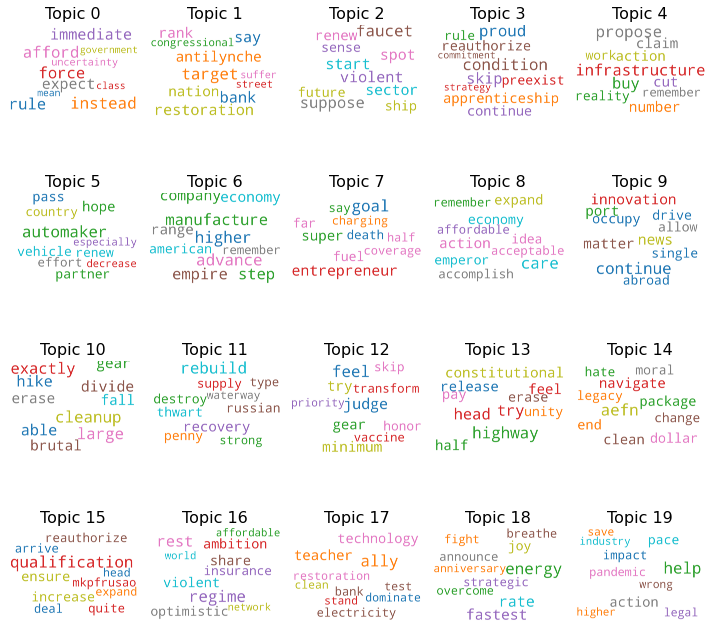

In [11]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  #color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = hdp_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/Users/isanavarro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


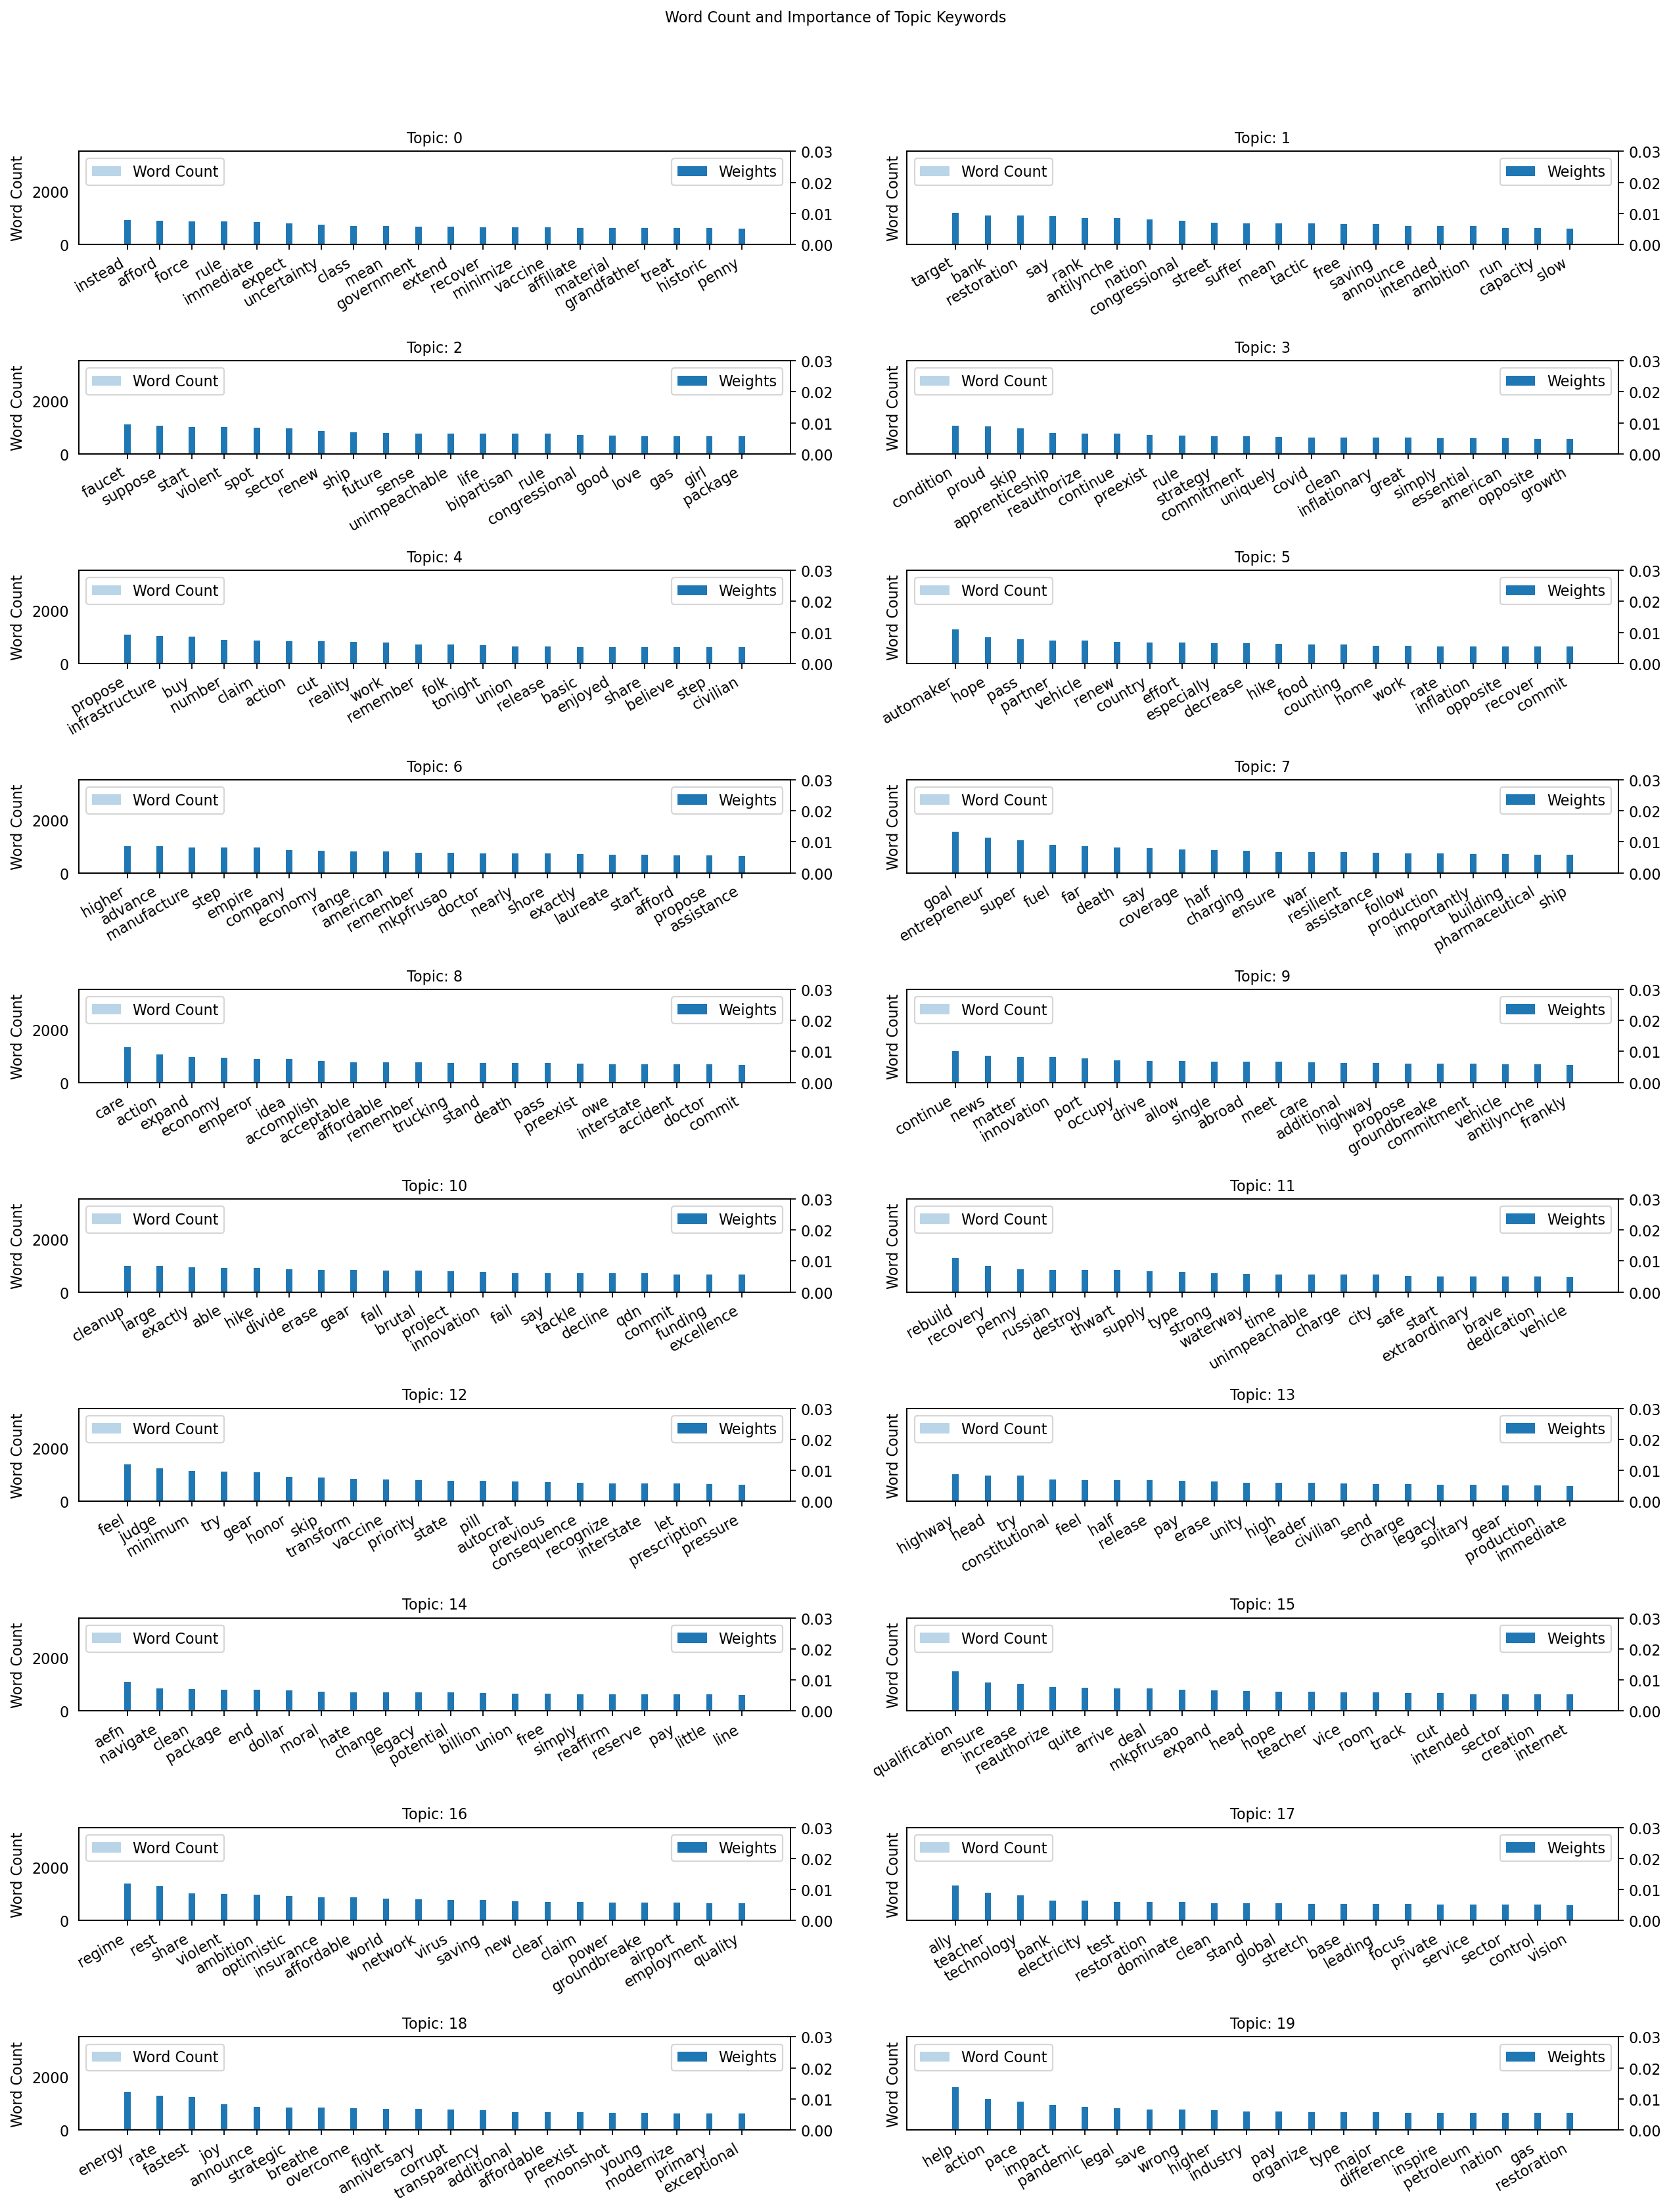

In [12]:
from collections import Counter
topics = hdp_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(10, 2, figsize=(16,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], width=1, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], width=0.2, label='Weights')
    ax.set_ylabel('Word Count')
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), fontsize=10)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=10, y=1.05)    
plt.show()